In [3]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

# 0)

In [4]:
plt.rcParams['figure.figsize'] = (17, 5)  
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }

In [6]:
opt_std =  {1:1.097324009878543,
            2:1.097324042581347,
            4: 0.5710655156439823,
            8: 0.28754191240507265,
            16: 0.14552024595543614,
            32: 0.07439700765663292,
            64: 0.03654101726025044,
            128: 0.018262391329213392,
            256: 0.009136370875837834,
            512: 0.004570016186845779,
            1024: 0.0022857004460788742,}


degree_step = {
            32: 10,
            64: 10,
            128: 50,
            256: 50,
            512: 100,
            1024: 200,    
}

# 1)

In [6]:
def plot_1(dic):
    for nside in dic1.keys():
        min_std = opt_std[nside]/10
        max_std = opt_std[nside]*10
        kernels = np.logspace(np.log10(min_std), np.log10(max_std), 5)

        for i, kernel_width in enumerate(dic1[nside].keys()):
            if i:
                step = degree_step[nside]
                n = len(dic1[nside][kernel_width])
                plt.plot(np.arange(n)*step, dic1[nside][kernel_width], '-o', label="t = {0:0.4f}".format(kernels[i]))
                plt.legend()
        plt.xlabel('Degree', fontdict=font)
        plt.ylabel('Equivariance Error', fontdict=font)
        plt.title('50 neighbors on HEALPix, nside={}'.format(nside), fontdict=font)
        plt.show()



In [7]:
dic1 = pickle.load( open( "experience1.pickle", "rb" ) )

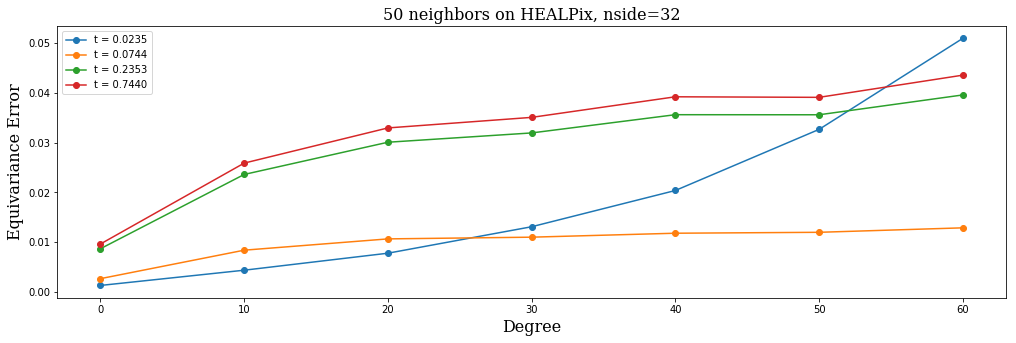

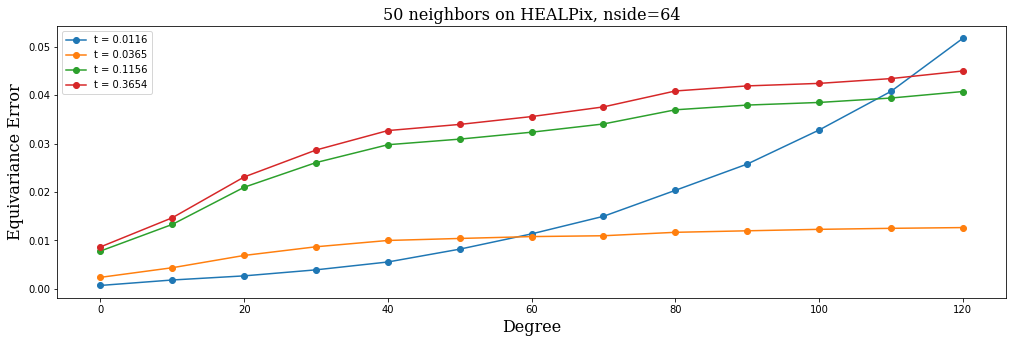

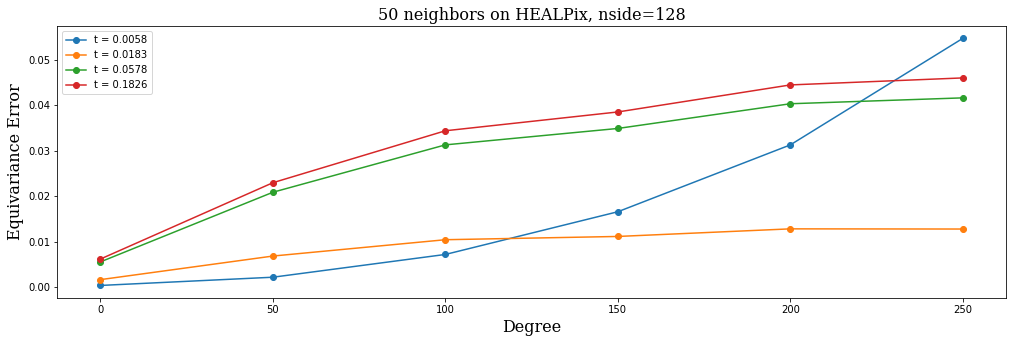

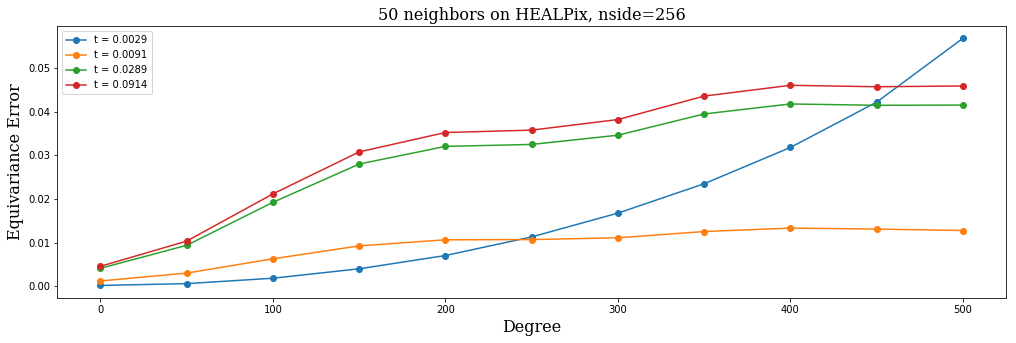

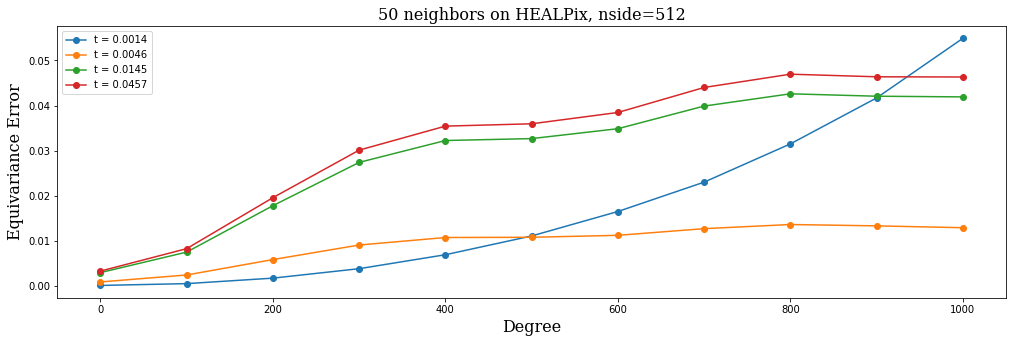

In [8]:
plot_1(dic1)

# 2)

In [58]:
def plot_deepsphere(dic, title):
    for nside in dic.keys():
        min_std = opt_std[nside]/10
        max_std = opt_std[nside]*10
        kernels = np.logspace(np.log10(min_std), np.log10(max_std), 5)


        step = degree_step[nside]
        n = len(dic[nside])
        plt.plot(np.arange(n)*step, dic[nside], '-o', label="nside = {0:0.0f}".format(nside))

        plt.legend()
    plt.xlabel('Degree', fontdict=font)
    plt.ylabel('Equivariance Error', fontdict=font)
    plt.title(title, fontdict=font)
    plt.grid()
    plt.savefig(title+".pdf")
    plt.show()
    

In [59]:
dic2 = pickle.load( open( "experience2_V1.pickle", "rb" ) )

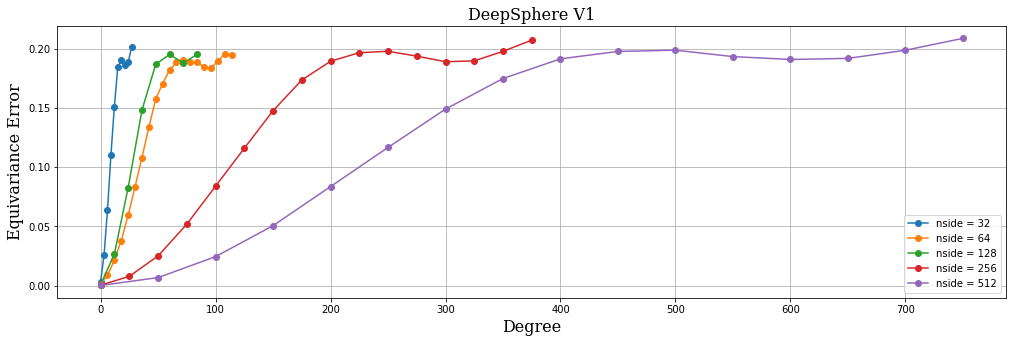

In [60]:
plot_deepsphere(dic2, "DeepSphere V1")

In [61]:
dic3 = pickle.load( open( "experience2_V2.pickle", "rb" ) )

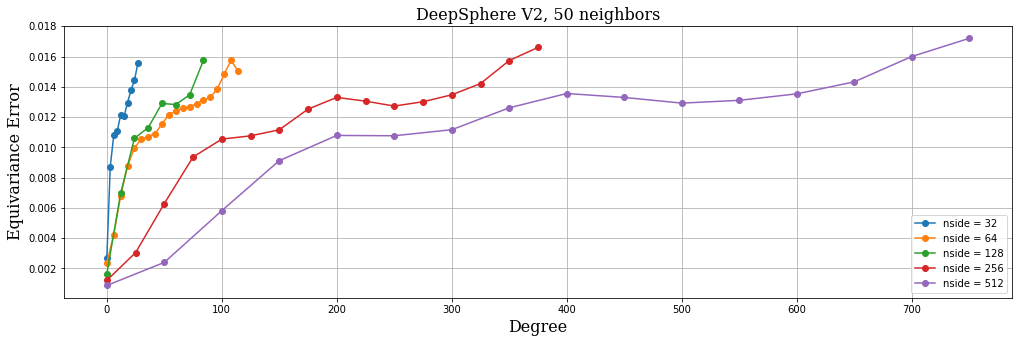

In [62]:
plot_deepsphere(dic3, "DeepSphere V2, 50 neighbors")

# 3) Grid search of the optimal kernel width by finding a LOCAL minimum of the equivariance error

### Goals:
* check the robustness of the  minimum with respect to the number of neighbors of the graph.
* compare these results to the ones obtained by first setting the number of neighbors to 50, and then finding the kernel width such that min(weights = 0.1) __here under__

In [14]:
dic4 = pickle.load( open( "experience4.pickle", "rb" ) )

In [19]:
n_neighbors = np.linspace(20, 100, 5, dtype=np.int)

def plot_4(dic):
    for nside in dic.keys():
        min_std = opt_std[nside]/10
        max_std = opt_std[nside]*10
        kernels = np.logspace(np.log10(min_std), np.log10(max_std), 20)


        for N in dic[nside].keys():
            plt.plot(kernels, dic[nside][N], '-o', label="n_neighbors = {0:0.0f}".format(N))
            j = np.argmin(dic[nside][N])
            plt.plot(kernels[j], dic[nside][N][j], 'rs', markersize=15)
        plt.legend()
        plt.xlabel('Kernel width', fontdict=font)
        plt.ylabel('Equivariance Error', fontdict=font)
        plt.title('50 neighbors on HEALPix, nside={}'.format(nside), fontdict=font)
        plt.grid()
        
        plt.plot(opt_std[nside], [0], 'bx', markersize=15)
        plt.show()
    
        

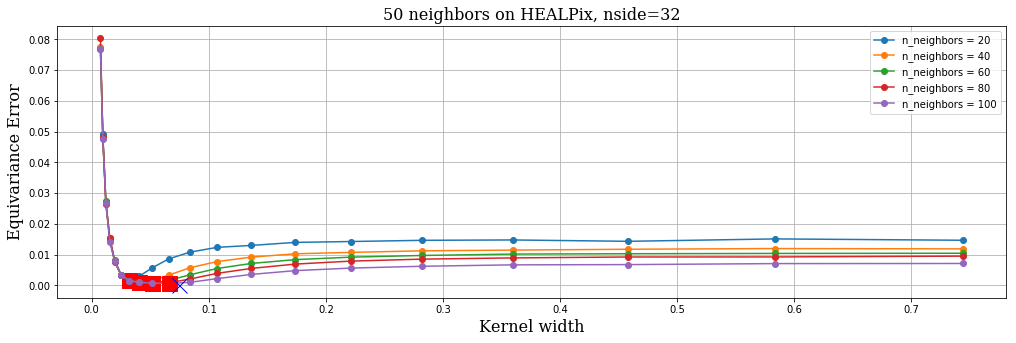

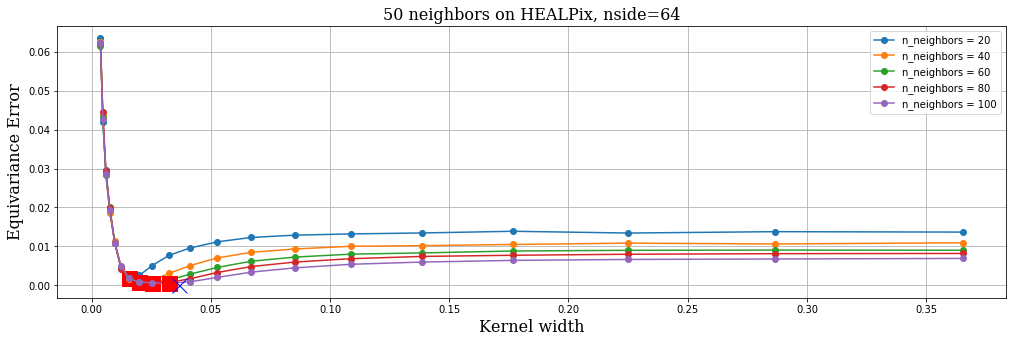

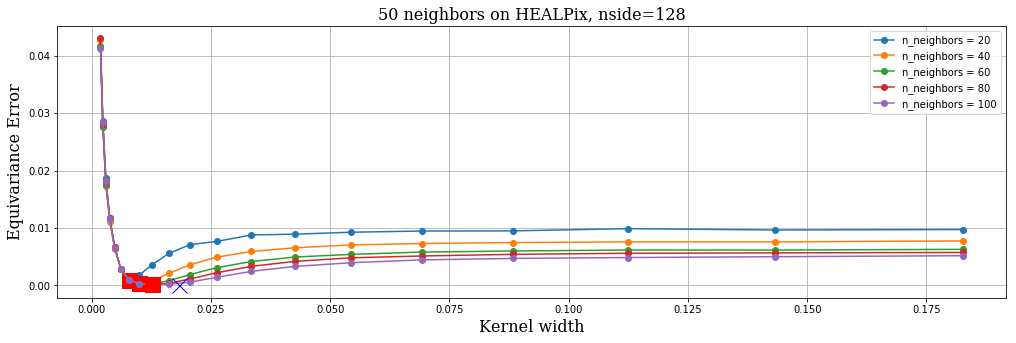

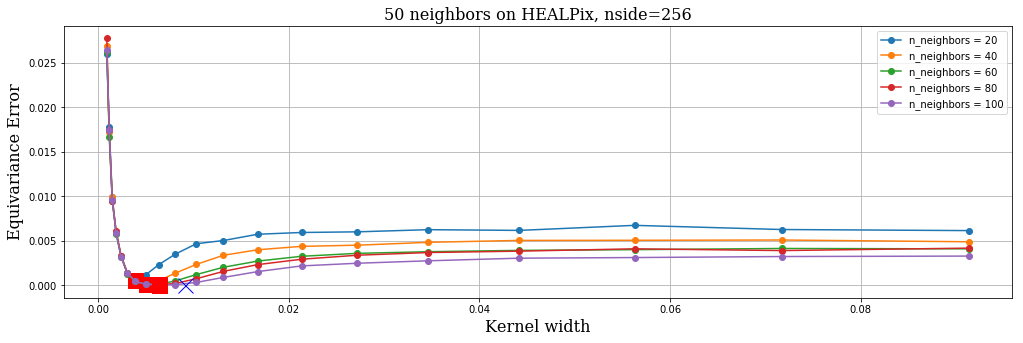

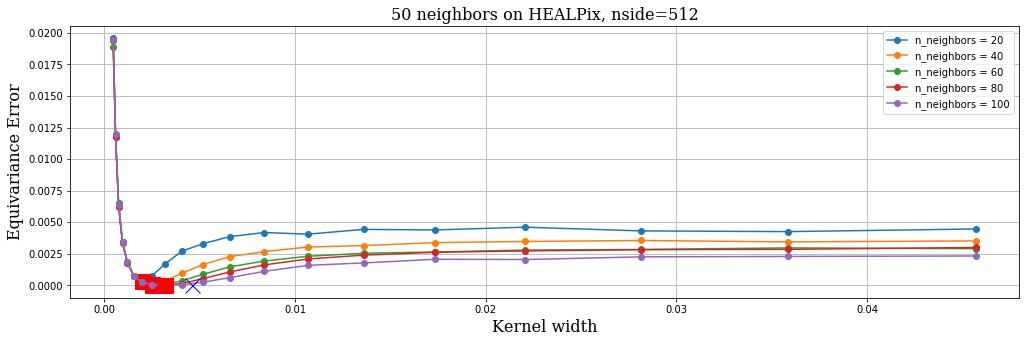

In [20]:
plot_4(dic4)

In [28]:
n_neighbors = np.linspace(20, 100, 5, dtype=np.int)

def print4(dic):
    for nside in dic.keys():
        min_std = opt_std[nside]/10
        max_std = opt_std[nside]*10
        kernels = np.logspace(np.log10(min_std), np.log10(max_std), 20)
        for N in dic[nside].keys():
            j = np.argmin(dic[nside][N])
            if N == 60:
                print(kernels[j])

print4(dic4)

0.051720263780058034
0.025403051964326
0.0126958828930447
0.006351539216088933
0.002493215645881148


# Khasanova-Frossard


In [63]:
degree_step = {
    4: 1,
    8: 2,
    16: 4,
    32: 3,
    64: 6,
    128: 12,
    256: 25,
    512: 50,
}

bws = [32, 64, 128, 256, 512]

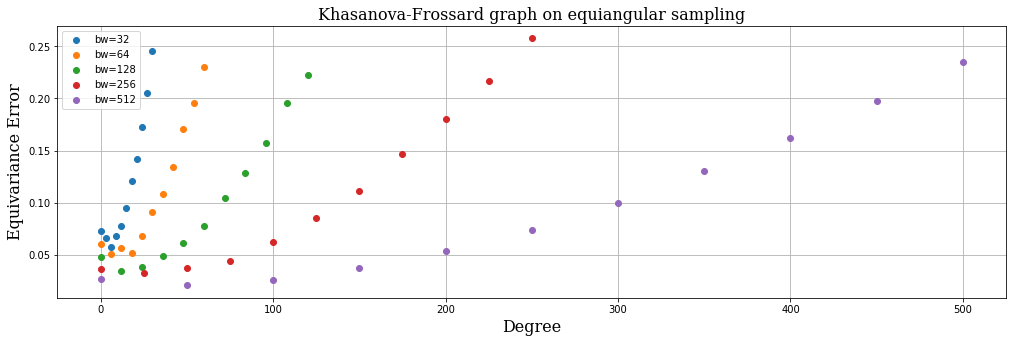

In [64]:
equiv_error = pickle.load(open('khasanova_frossard.pickle', 'rb'))
for bw in bws:
    lmax = bw
    
    degrees = np.arange(0, lmax, degree_step[bw])

    plt.plot(degrees,equiv_error[bw], 'o', label='bw={}'.format(bw))
    
plt.xlabel('Degree', fontdict=font)
plt.ylabel('Equivariance Error', fontdict=font)
plt.title('Khasanova-Frossard graph on equiangular sampling', fontdict=font)
plt.grid()
plt.legend()
plt.savefig("khasanova_frossard.pdf")
plt.show()


# SHREC17

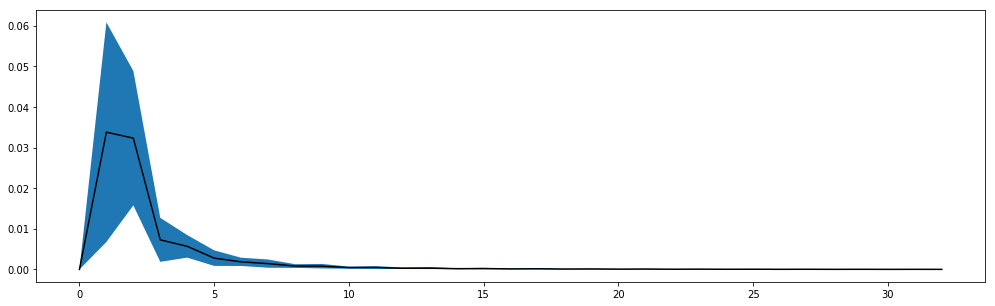

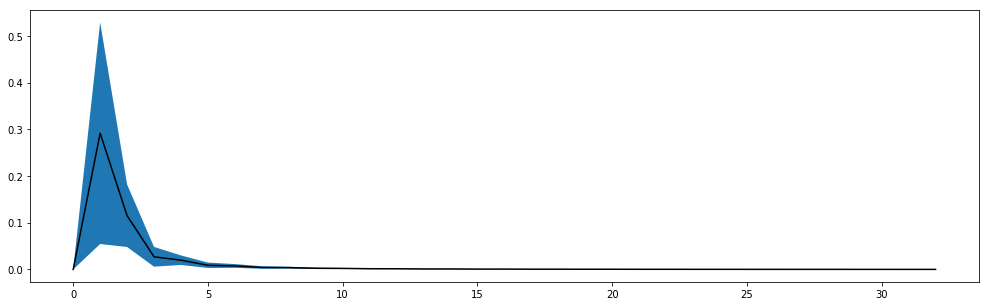

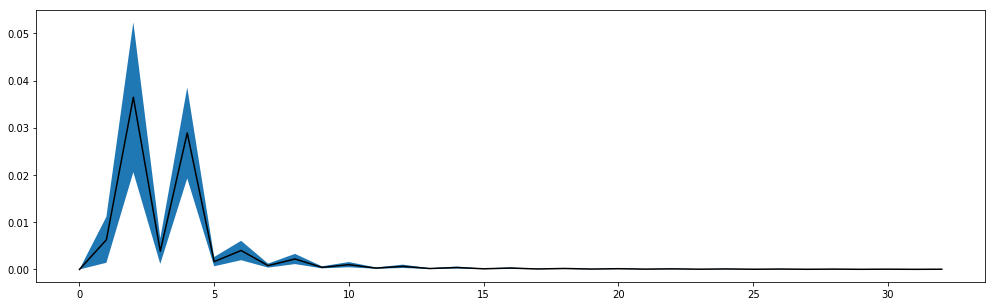

In [9]:
cl = pickle.load(open('shrec17_spectrum.pickle', 'rb'))

# 1000 objects out of 30k were randomly sampled to be analyzed.
# The mean was subtracted from each signal in a preprocessing step.
# The spectrum was computed by healpy.anafast up to lmax=nside (since there's nothing beyond)

# cl is a dictionary with keys = {1, 2, 3}.
# cl[feature] is a matrix of shape [1000, 33] where each row is the spectrum of one signal

nside=32

avg_spectrum = dict()
n_hmaps = 1000
lmax = nside

for feature in range(3):
    
    # here I compute the average spectrum by averaging the rows of cl[feature]
    avg_spectrum[feature] = np.mean(cl[feature], axis=0)
    
    # here I calculate the standard deviation of the spectra to plot a confidence interval around the 
    # average spectrum
    std_dev = np.std(cl[feature], axis=0)

    plt.plot(avg_spectrum[feature], 'k-')
    plt.fill_between(x, avg_spectrum[feature]-0.5*std_dev, avg_spectrum[feature]+0.5*std_dev)
    plt.show()


In [39]:
plt.rcParams['figure.figsize'] = (17, 5)  
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 24,
        }


font_x = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 24,
        }

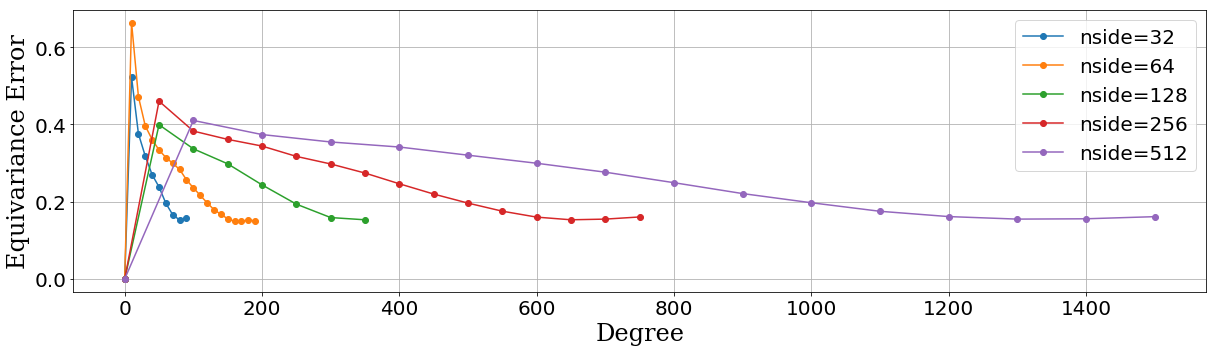

In [42]:
nsides = [32, 64, 128, 256, 512]
equiv_error = pickle.load(open('V1 - ||Lf||.pickle', 'rb'))
for nside in nsides:
    lmax = 3*nside-1


    degrees = np.arange(0, lmax+1, degree_step[nside])
 
    plt.plot(degrees, equiv_error[nside], 'o-', label='nside={}'.format(nside))

plt.xlabel('Degree', fontdict=font_x)
plt.ylabel('Equivariance Error', fontdict=font)
plt.tick_params(axis='both', which='major', labelsize=20)

plt.grid()
plt.legend(prop={'size': 20})
plt.tight_layout()
plt.savefig("V1.pdf")
plt.show()


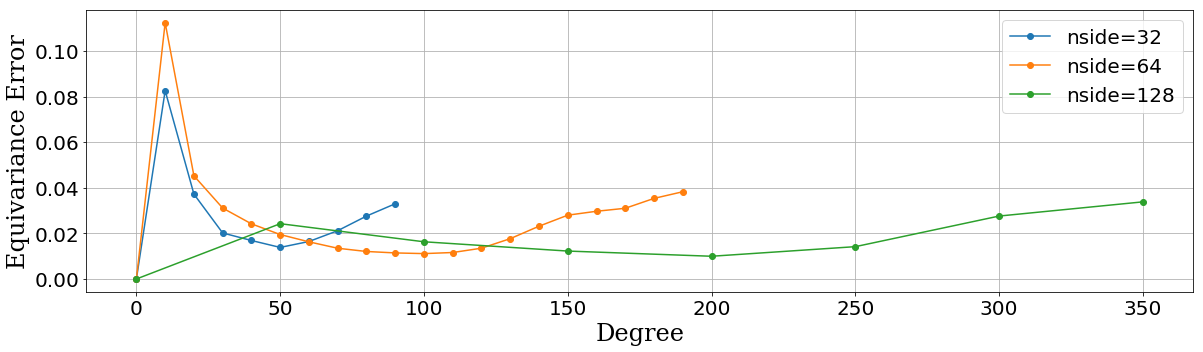

In [47]:
nsides = [32, 64, 128]
equiv_error = pickle.load(open('V2 - 20 neighbors - ||Lf||.pickle', 'rb'))
for nside in nsides:
    lmax = 3*nside-1


    degrees = np.arange(0, lmax+1, degree_step[nside])
 
    plt.plot(degrees, equiv_error[nside], 'o-', label='nside={}'.format(nside))

plt.xlabel('Degree', fontdict=font_x)
plt.ylabel('Equivariance Error', fontdict=font)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid()
plt.legend(prop={'size': 20})
plt.tight_layout()
plt.savefig("V2_20.pdf")
plt.show()

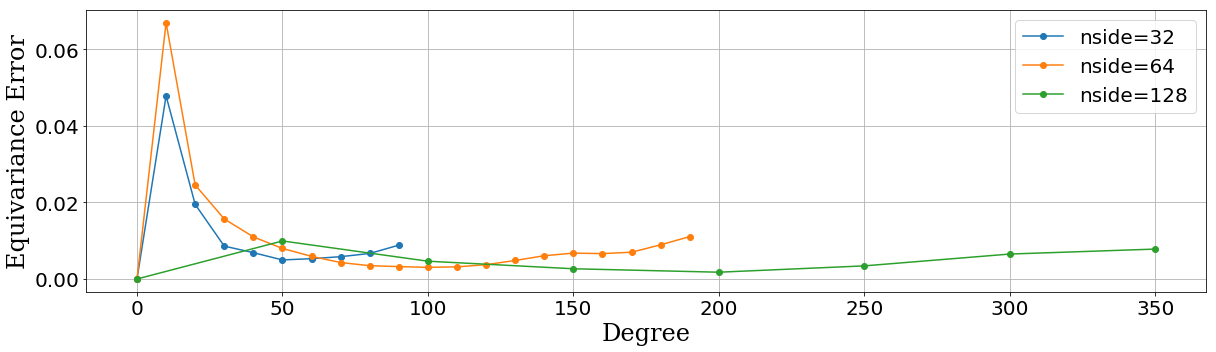

In [46]:
nsides = [32, 64, 128]
equiv_error = pickle.load(open('V2 - 40 neighbors - ||Lf||.pickle', 'rb'))
for nside in nsides:
    lmax = 3*nside-1


    degrees = np.arange(0, lmax+1, degree_step[nside])
 
    plt.plot(degrees, equiv_error[nside], 'o-', label='nside={}'.format(nside))

plt.xlabel('Degree', fontdict=font_x)
plt.ylabel('Equivariance Error', fontdict=font)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid()
plt.legend(prop={'size': 20})
plt.tight_layout()
plt.savefig("V2_40.pdf")
plt.show()

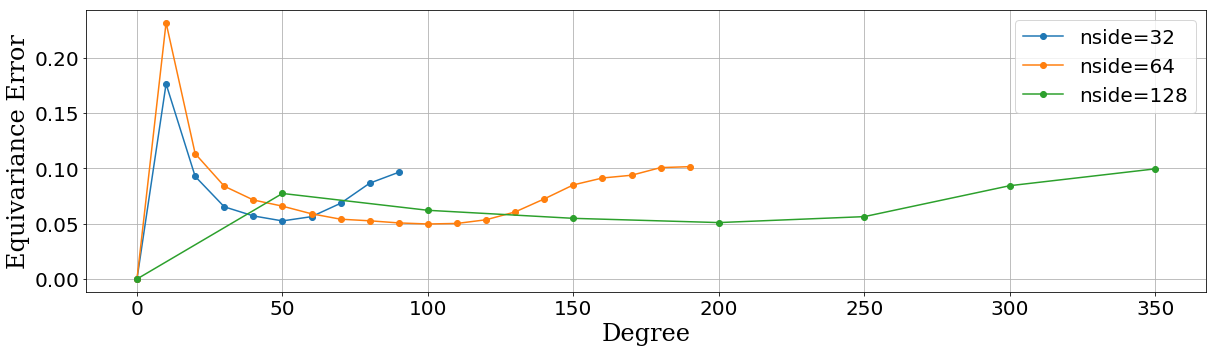

In [48]:
nsides = [32, 64, 128]
equiv_error = pickle.load(open('V2 - 8 neighbors - ||Lf||.pickle', 'rb'))
for nside in nsides:
    lmax = 3*nside-1


    degrees = np.arange(0, lmax+1, degree_step[nside])
 
    plt.plot(degrees, equiv_error[nside], 'o-', label='nside={}'.format(nside))

plt.xlabel('Degree', fontdict=font_x)
plt.ylabel('Equivariance Error', fontdict=font)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid()
plt.legend(prop={'size': 20})
plt.tight_layout()
plt.savefig("V2_40.pdf")
plt.show()